In [1]:
import pandas as pd
import numpy as np
import time, datetime
from sklearn import datasets, linear_model

#import matplotlib
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn
import seaborn as sns

#local plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

## Data definitions from Spotify

- Beats Per Minute (BPM) — The tempo of the song.
- Energy — The energy of a song, the higher the value, the more energetic.
- Danceability — The higher the value, the easier it is to dance to this song.
- Loudness — The higher the value, the louder the song (in dB).
- Valence — The higher the value, the more positive mood for the song.
- Length — The duration of the song.
- Acousticness — The higher the value the more acoustic the song is.
- Release Year — The year each song was released.
- Popularity — The higher the value the more popular the song is.

## Upload CSV of SG Lewis Playlist

- update `release` to date_time
- convert `length` to Minutes:Seconds
- after converting `length`, calculate how long each song is by seconds

In [2]:
df = pd.read_csv("sg_lewis_playlist.csv", encoding = 'cp1252') #encoding cp1252 needed

In [3]:
#change release to date format
df['release'] = pd.to_datetime(df['release'])

#convert length to time
df['length'] = df['length'].apply(lambda x: time.strptime(x,'%M:%S'))

In [4]:
#find how many seconds each song is

df['length'] = df['length'].apply(lambda x: datetime.timedelta(minutes=x.tm_min, seconds=x.tm_sec).seconds)

In [5]:
df.head()

,order,title,artist,release,bpm,energy,dance,loud,valence,length,acoustic,pop
0,1,New Chain,Col3trane,2017-05-19,139,45,57,-6,35,221,17,27
1,2,Biking,Frank Ocean,2017-04-10,148,46,67,-7,27,278,68,78
2,3,Want You In My Soul - Club Mix,Lovebirds,2015-03-27,121,68,75,-6,43,498,6,49
3,4,Wait For It,H.E.R.,2016-09-09,158,34,67,-15,30,136,19,55
4,5,The Truth,Moonchild,2015-11-20,76,42,79,-11,25,219,65,38


## Scatter Plot for `length` of each song by `order`

- test between **matplotlib** vs **plotly**

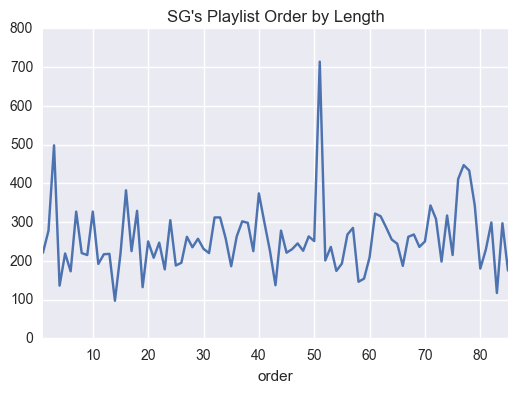

In [92]:
df_line = df[['order','length']]
df_line = df_line.set_index('order')
df_line.plot(title="SG's Playlist Order by Length",legend=None)

#for saving it later
#fig = purchase_plot.get_figure()
#fig.savefig("total-sales.png")

In [95]:
#plotly
# Create a trace
trace = go.Scatter(
    x = df['order'],
    y = df['length']
)

data = [trace]

iplot(data, filename='basic-line')

## Does `Energy` and `Dance` correlate in the playlist?

In [108]:
trace1 = go.Scatter(
    x = df['order'],
    y = df['energy'],
    mode = 'lines',
    name = 'Energy'
)
trace2 = go.Scatter(
    x = df['order'],
    y = df['dance'],
    mode = 'lines',
    name = 'Dance'
)
data = [trace1, trace2]


# Edit the layout
layout = dict(title = 'Relationship of Energy and Dance',
              xaxis = dict(title = 'Playlist Order'),
              yaxis = dict(title = 'Energy/Dance'),
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename='playlist_dancing')

## Distribution testing

In [7]:
df.shape

(85, 12)

In [ ]:

plt.figure(1, figsize=(20, 10),)

hfont = {'fontname':'Proxima Nova'}

plt.subplot(331)
sns.distplot(df['energy']);
#plt.text(10, .010, r'$\mu=\ 121.12$', fontsize=22)
plt.xlabel('Energy', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(332)
sns.distplot(df['valence']);
#plt.text(70, .020, r'$\mu=\ 30.51$', fontsize=22)
plt.xlabel('Valence', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(333)
sns.distplot(df['dance']);
#plt.text(70, .020, r'$\mu=\ 30.51$', fontsize=22)
plt.xlabel('Dance', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(334)
sns.distplot(df['pop']);
#plt.text(70, .020, r'$\mu=\ 30.51$', fontsize=22)
plt.xlabel('Popularity', fontsize=18, **hfont)
plt.grid(True)

/Users/michael.aguenza/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



## Correlation against BPM Heat Maps

In [6]:
corr_df = df.copy() #df.corr(method='pearson')

In [11]:
corr_df = corr_df.drop(corr_df.columns[[0,1,2]], axis=1) 

In [15]:
corr_df = corr_df.corr(method = 'pearson')

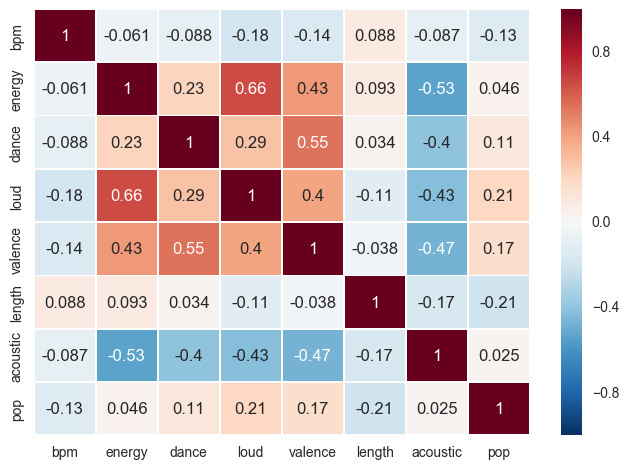

In [33]:
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values,
            linewidths=0.5, annot=True)

In [37]:
data = [go.Heatmap( 
                z=corr_df.values.tolist(), 
                x=corr_df.columns.tolist(),
                y=corr_df.columns.tolist(), 
                colorscale='Viridis'
        )]

iplot(data, filename='pandas-heatmap')

In [43]:

trace1 = go.Heatmap(
    z=corr_df.values.tolist(),  # correlation as color contours 
    x=corr_df.columns.tolist(),      # sites on both
    y=corr_df.columns.tolist(),      #  axes
    zauto=False,  # (!) overwrite Plotly's default color levels
    zmin=0.4,     # (!) set value of min color level
    zmax=1,       # (!) set value of max color level
    colorscale='YIOrRd', # light yellow-orange-red colormap
    reversescale=True    # inverse colormap order
)

data = [trace1]

iplot(data, filename='plotly-heatmap', validate=False)